In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [7]:
train_data=pd.read_csv("mnist/mnist_train_min.csv")

In [8]:
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_data=pd.read_csv("mnist/mnist_test.csv")

In [10]:
test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_data.info()
#el resultado me indica que tiene 60,000 filas y 785 columnas, todas con valores enteros de 64 bits, 
#y ocupa alrededor de 359.3 megabytes de memoria en tu sistema.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 299.5 MB


In [12]:
test_data.info()
#la interpretación de los resultados me indica que DataFrame contiene 10,000 muestras, 
#cada una representada por 785 características (784 para los valores de los píxeles y 1 para la etiqueta). 
#El DataFrame utiliza aproximadamente 59.9 megabytes de memoria en tu sistema.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [13]:
print("Datos de entrenamiento:")

Datos de entrenamiento:


In [14]:
print(train_data.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [15]:
test_data['sumapixelizq'] = test_data.iloc[0:,1:392].sum(axis=1)

In [16]:
test_data['sumapixelder'] =test_data.iloc[0:,393:785].sum(axis=1)

In [17]:
train_data['sumapixelizq'] = train_data.iloc[0:,1:392].sum(axis=1)

In [18]:
train_data['sumapixelder'] =train_data.iloc[0:,393:785].sum(axis=1)

In [19]:
#Extraemos características y etiquetas
X_train = train_data.drop(columns=['label']).values

In [20]:
y_train = train_data['label'].values

In [21]:
X_test = test_data.drop(columns=['label']).values

In [22]:
y_test = test_data['label'].values

In [23]:
X_train_sum = np.sum(X_train, axis=1).reshape(-1, 1)
X_test_sum = np.sum(X_test, axis=1).reshape(-1, 1)

In [24]:
X_train_with_sum = np.concatenate((X_train, X_train_sum), axis=1)
X_test_with_sum = np.concatenate((X_test, X_test_sum), axis=1)

In [25]:
#Entrenamiento del modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
#clf.fit(X_train, y_train)
clf.fit(X_train_with_sum, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Evaluar el modelo
#y_pred = clf.predict(X_test)

In [28]:
y_pred = clf.predict(X_test_with_sum)

In [29]:
#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

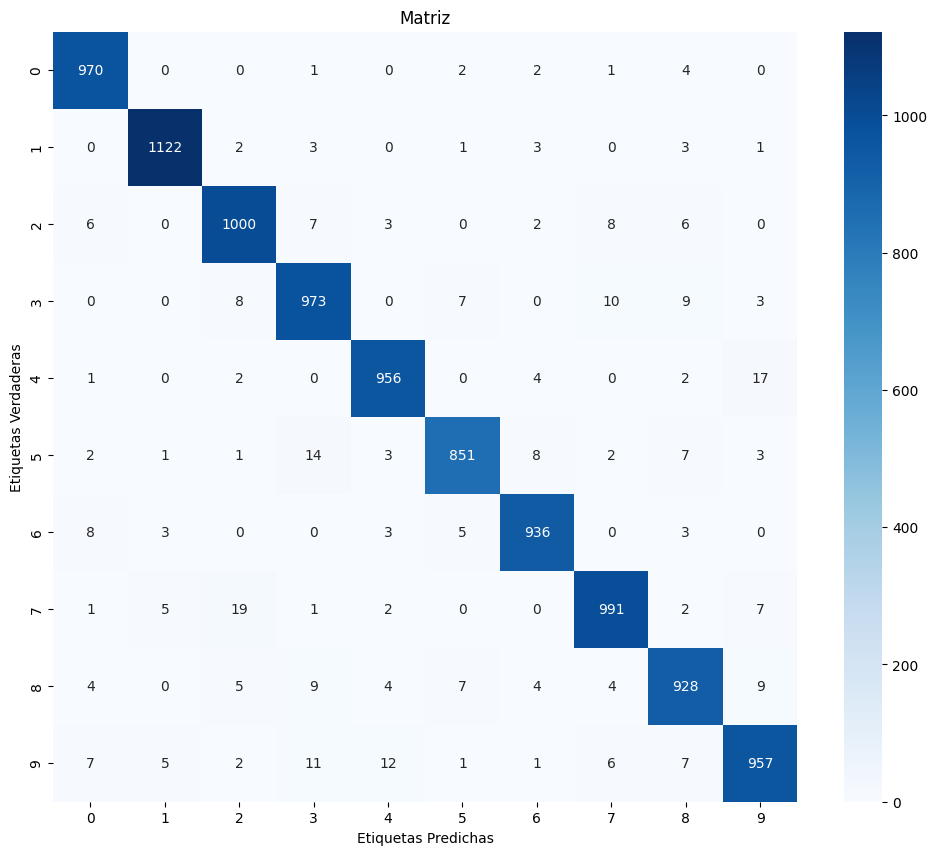

In [30]:
#Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
#plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Matriz')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
#plot_confusion_matrix(clf, X_test_with_sum, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

In [31]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 96.84%
